In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import cluster
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import scale

# the above are everything that needs imported into this Notebook in order to complete this project
# an explanation for why each is imported can be found in the Appendices of the Report

In [2]:
pokemon = pd.read_csv("pokemon.csv", index_col = 1)
# reading in the chosen data set and assigning it a variable name
# assigning Pokedex Number as the index

In [3]:
pokemon.shape
# first noted item is how many observations have been noted (920 species of Pokemon)
# the second noted value if how many columns of data is provided for each obsevation (15 columns)

(920, 15)

In [4]:
pokemon.head()
# the pokemon data is organised according to ascending value of base_total as can be seen below

,generation,name,type_1,type_2,hp,attack,defense,sp_attack,sp_defense,speed,base_total,tier,legendary,alternate,mega
pokedex_number,,,,,,,,,,,,,,,
746,7,Wishiwashi Solo,water,NaN,45,20,20,25,25,40,175,Untiered,False,False,False
191,2,Sunkern,grass,NaN,30,30,30,30,30,30,180,LC,False,False,False
298,3,Azurill,normal,fairy,50,20,40,20,40,20,190,LC,False,False,False
401,4,Kricketot,bug,NaN,37,25,41,25,41,25,194,LC,False,False,False
10,1,Caterpie,bug,NaN,45,30,35,20,20,45,195,LC,False,False,False


I wish to check the names of each of the columns within the dataset.
<br>
This was achieved with the following code.

In [5]:
pokemon.columns
# provides a list of all of the titles of the columns within the data set

Index(['generation', 'name', 'type_1', 'type_2', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'base_total', 'tier', 'legendary',
       'alternate', 'mega'],
      dtype='object')

Some Pokemon are classified as "Mega"
<br>
This refers to an in battle transformation, which appplies a number of changes.
<br>
Some of the changes are listed below: 
<br>
Increase their base stat total (normally by 100 base points) 
<br>
Change in ability (for example Mega Gengar gains 'Shadow Tag') 
<br>
Change in type (for example Mega Groudon gains the fire type)
<br>
The following code allows me to check how many Pokemon are classified as Mega Evolutions.

In [6]:
mega = pokemon['mega'].value_counts()
print(mega)
# this shows how many Mega Pokemon there are within the dataset.

False    868
True      52
Name: mega, dtype: int64


We have 52 Pokemon which have been identified as being Mega Evolutions.
<br>
This includes a total of 48 Pokemon which are capable of Mega Evolving, as well as the two Primal Reversions for Kyogre & Groudon. The final two Pokemon being classified as Mega Evolutions for the purposes of this investigation are Ash Greninja (which sees a stat increase of 110 BST) and Ultra Necrozma (which sees a stat increase of 74 from it's fusion forms, and of 154 from it's base form).

In [7]:
pokemon_only_mega = pokemon[pokemon['mega'] == True]
pokemon_only_mega.describe()
# This is the descriptive statistics when only Mega Pokemon are considered

,generation,hp,attack,defense,sp_attack,sp_defense,speed,base_total
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2.634615,79.326923,128.865385,105.923077,117.173077,99.384615,94.826923,626.461538
std,1.414613,16.015582,34.719621,36.854162,42.896008,20.477777,34.280687,74.710805
min,1.000000,50.000000,50.000000,40.000000,15.000000,60.000000,20.000000,480.000000
25%,1.000000,69.500000,102.250000,80.000000,80.000000,84.500000,75.000000,587.500000
50%,3.000000,78.500000,135.500000,100.000000,126.000000,96.500000,100.000000,616.500000
75%,3.000000,95.000000,151.250000,120.000000,150.750000,111.250000,115.000000,655.000000
max,7.000000,108.000000,190.000000,230.000000,194.000000,160.000000,150.000000,780.000000


In [8]:
pokemon_no_mega = pokemon[pokemon['mega'] == False]
pokemon_no_mega.describe()
# These are the descriptive statistics when Mega Pokemon are not considered

,generation,hp,attack,defense,sp_attack,sp_defense,speed,base_total
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,3.859447,69.049539,77.245392,72.718894,70.512673,70.597926,66.806452,426.829493
std,1.982871,26.500786,30.040279,29.891449,30.522495,27.378771,28.268801,112.935431
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,2.000000,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000,325.000000
50%,4.000000,65.000000,75.000000,70.000000,65.000000,67.000000,65.000000,440.000000
75%,5.000000,80.000000,98.500000,90.000000,91.250000,86.000000,90.000000,500.000000
max,7.000000,255.000000,181.000000,230.000000,180.000000,230.000000,180.000000,720.000000


As can be seen above Mega Pokemon tend to have higher stats across the board when compared to base form Pokemon.
<br>
These in battle transformations are only temporary, and as such a decision has been made to exclude them from the data set in order to prevent these temporary transformations from skewing the data.

In [9]:
pokemon = pokemon[pokemon['mega'] == False]
pokemon = pokemon.drop('mega', axis = 1)

The above lines of code have kept all pokemon which are NOT classifed as Mega, before removing the column which contains boolean values denoting whether or not a Pokemon are classified as Mega as this information is no longer relevant for the purposes of this investigation.

Pokemon has existed since 1999 in the UK (1996 in Japan) and over this time they have released a total of 7 generations of Pokemon, with an 8th set to be released worldwide on November 15th 2019.
<br>
The Pokemon games have introduced varying numbers of Pokemon with each new generation of games as can be seen below.
<br>
While the numbers stated below do not match "official" sources this is explained by the fact that I have included all alternate versions for Pokemon within this dataset as separate entities, the reason for which will be made clearer as this analysis progresses.

1    151
2    100
3    141
4    116
5    163
6     82
7    115
Name: generation, dtype: int64


Text(0, 0.5, 'Number of Pokemon')

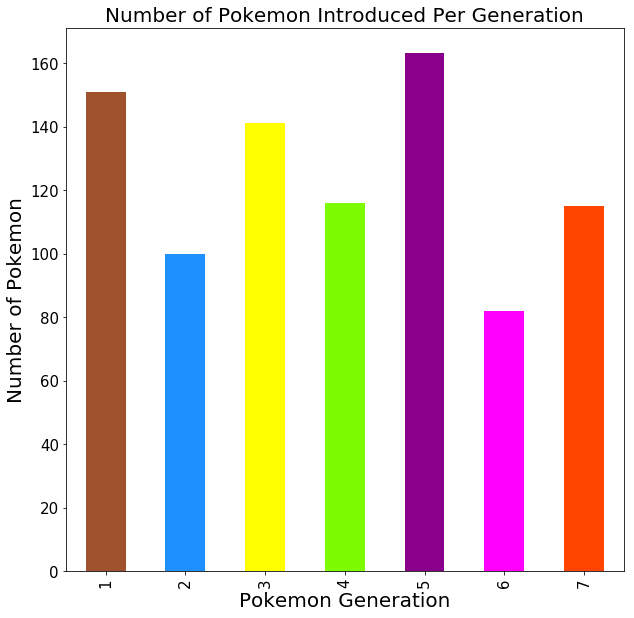

In [10]:
generation = pokemon['generation'].value_counts()

generation = generation.sort_index()
print(generation)

generation = generation.plot(kind = 'bar', figsize = (10, 10),fontsize = (15),
                            color = ['sienna', 'dodgerblue', 'yellow', 'lawngreen', 'darkmagenta', 'magenta', 'orangered'])

generation.set_title('Number of Pokemon Introduced Per Generation', fontsize = 20)
generation.set_xlabel('Pokemon Generation', fontsize = 20)
generation.set_ylabel('Number of Pokemon', fontsize = 20)

Pokemon originally had a total of 15 types within the first generation of games.
<br>
For game balancing reasons, due to the dominance of the Psychic type, two new types were introduced in Generation 2. These new types were Dark & Steel with previous Pokemon & moves being changed to better match with these new types.
<br>
The 17 types remained consistent until Generation 7 when an eighteenth type was introduced to weaken Dragon, which was long considered the best type, and to boost types which were generally considered weak, such as the Poison type.
<br>
The primary & secondary types are noted below, with a combination count and bar chart following which shows the total number of Pokemon of each type.
<br>
While this analysis does not assess the impact of a Pokemon's type in tier placement, it is a potential factor which could be explanatory.

water       116
normal      108
grass        80
bug          74
psychic      60
fire         56
rock         52
electric     48
poison       36
ghost        35
ground       35
dark         31
dragon       31
fighting     29
ice          28
steel        27
fairy        18
flying        4
Name: type_1, dtype: int64


Text(0, 0.5, 'Number of Pokemon')

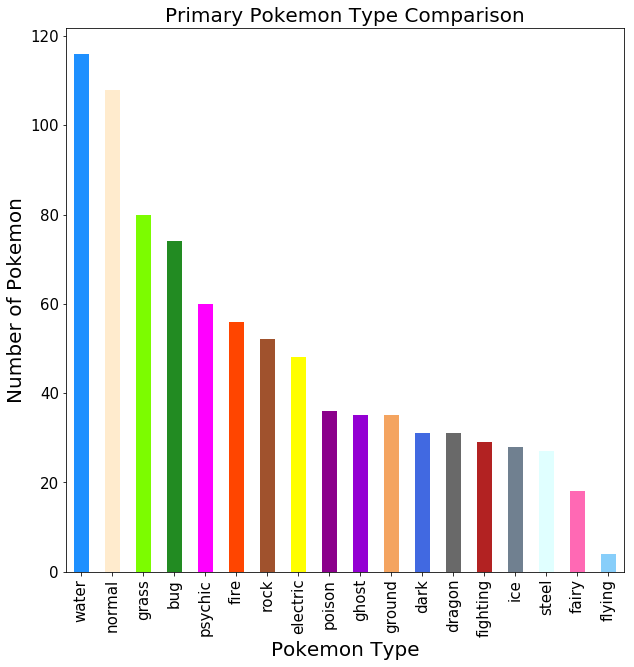

In [11]:
primary_type = pokemon['type_1'].value_counts()
print(primary_type)

primary_type = primary_type.plot(kind = 'bar', figsize = (10, 10), fontsize = (15),
                  color = ['dodgerblue', 'blanchedalmond', 'lawngreen', 'forestgreen', 'magenta', 'orangered', 'sienna', 'yellow', 'darkmagenta', 'darkviolet', 'sandybrown', 'royalblue', 'dimgray', 'firebrick', 'slategray', 'lightcyan', 'hotpink', 'lightskyblue'])

primary_type.set_title('Primary Pokemon Type Comparison', fontsize = 20)
primary_type.set_xlabel('Pokemon Type', fontsize = 20)
primary_type.set_ylabel('Number of Pokemon', fontsize = 20)

flying      103
ground       35
poison       32
psychic      31
fairy        30
steel        29
grass        26
fighting     26
dark         22
dragon       20
ghost        19
water        18
ice          14
rock         14
fire         12
electric     11
bug           5
normal        4
Name: type_2, dtype: int64


Text(0, 0.5, 'Number of Pokemon')

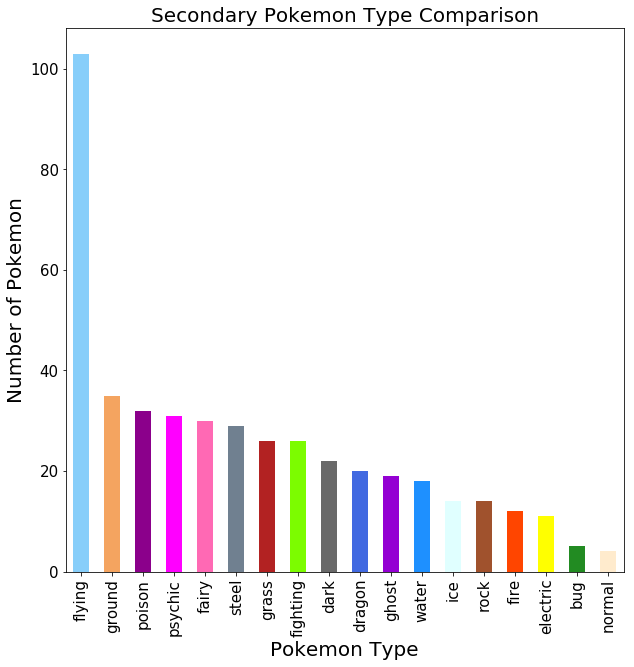

In [12]:
secondary_type = pokemon['type_2'].value_counts()
print(secondary_type)

secondary_type = secondary_type.plot(kind = 'bar', figsize = (10, 10), fontsize = (15),
                                     color = ['lightskyblue', 'sandybrown', 'darkmagenta', 'magenta', 'hotpink', 'slategray', 'firebrick', 'lawngreen', 'dimgray', 'royalblue', 'darkviolet', 'dodgerblue', 'lightcyan', 'sienna', 'orangered', 'yellow', 'forestgreen', 'blanchedalmond'])

secondary_type.set_title('Secondary Pokemon Type Comparison', fontsize = 20)
secondary_type.set_xlabel('Pokemon Type', fontsize = 20)
secondary_type.set_ylabel('Number of Pokemon', fontsize = 20)

water       134
normal      112
flying      107
grass       106
psychic      91
bug          79
ground       70
poison       68
fire         68
rock         66
electric     59
steel        56
fighting     55
ghost        54
dark         53
dragon       51
fairy        48
ice          42
dtype: int64


Text(0, 0.5, 'Number of Pokemon')

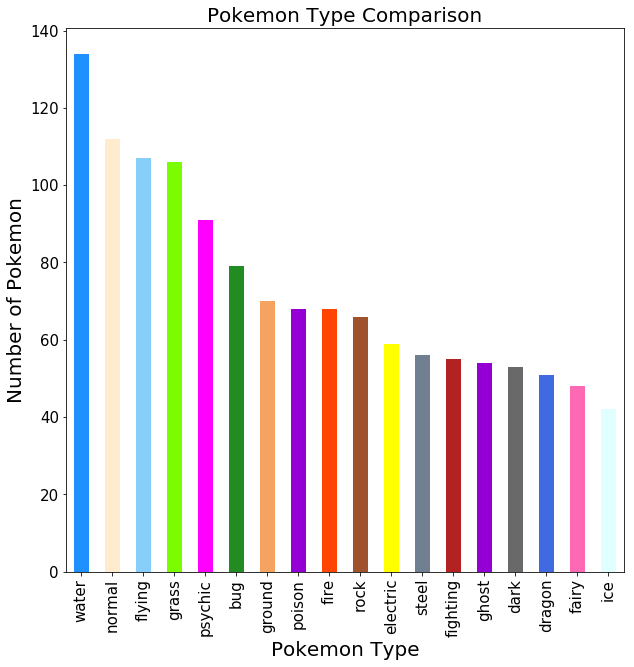

In [13]:
total_type = pokemon['type_1'].value_counts() + pokemon['type_2'].value_counts()
total_type = total_type.sort_values(ascending = False)
print(total_type)

total_type = total_type.plot(kind = 'bar',
                             figsize = (10, 10),
                             fontsize = (15),
                             color = ['dodgerblue', 'blanchedalmond', 'lightskyblue', 'lawngreen', 'magenta', 'forestgreen', 'sandybrown', 'darkviolet', 'orangered', 'sienna', 'yellow', 'slategray', 'firebrick', 'darkviolet', 'dimgray', 'royalblue', 'hotpink', 'lightcyan'])
total_type.set_title('Pokemon Type Comparison', fontsize = 20)
total_type.set_xlabel('Pokemon Type', fontsize = 20)
total_type.set_ylabel('Number of Pokemon', fontsize = 20)

There exist Pokemon which have what are known as alternate forms.
<br>
This means that certain attributes of the Pokemon change based upon which form they are in.
<br>
For the purposes of this analysis only Pokemon who's type or base stat total change are included.
<br>
No Pokemon who experiences merely an aesthetic change are included, such as Deerling and Sawsbuck who change appearance based upon the season with the game (a mechanic introduced in generation 5).

False    828
True      40
Name: alternate, dtype: int64


Text(0.5, 1.0, 'Pokemon with Alternate Forms')

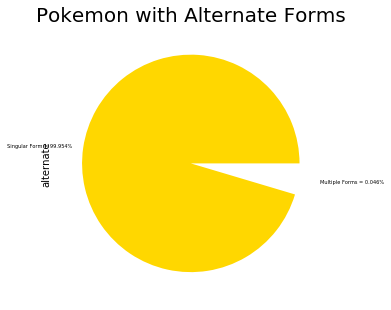

In [14]:
alternate = pokemon['alternate'].value_counts()

print(alternate)

alternate = alternate.plot(kind = 'pie',
                           figsize = (10,5),
                           fontsize = (5),
                           explode = (0, 0.1),
                           colors = ['gold', 'white'],
                           labels = ('Singular Form = 99.954%','Multiple Forms = 0.046%'))

alternate.set_title('Pokemon with Alternate Forms', fontsize = 20)

A total of 40 Pokemon are classified as having an alternate form when assessment is carried out based on the criteria outlined above.
<br>
The purpose of this classification and assessment is due to Pokemon such as Rotom.
<br>
Rotom in it's base form is an Electric and Ghost type Pokemon.
<br>
Rotom also has what are known as appliance forms, where it's Ghost typing is replaced by a new secondary typing.
<br>
The Rotom appliance forms have a different base stat total than their base form.
<br>
Each of the Rotom forms is placed in a separate tier based on individual merit, as can be seen from the below output.

In [15]:
Rotom = pokemon[pokemon['name'].str.contains("Rotom")]
print(Rotom)

                generation         name    type_1  type_2  hp  attack  \
pokedex_number                                                          
479                      4        Rotom  electric   ghost  50      50   
479                      4   Rotom Wash  electric   water  50      65   
479                      4  Rotom Frost  electric     ice  50      65   
479                      4    Rotom Mow  electric   grass  50      65   
479                      4    Rotom Fan  electric  flying  50      65   
479                      4   Rotom Heat  electric    fire  50      65   

                defense  sp_attack  sp_defense  speed  base_total      tier  \
pokedex_number                                                                
479                  77         95          77     91         440        NU   
479                 107        105         107     86         520        OU   
479                 107        105         107     86         520        PU   
479                 

Pokemon can be classified based upon the Tier in which they reside.
<br>
The information for which tier each Pokemon has been classified as residing in was gathered from https://www.smogon.com/dex/sm/pokemon/
<br>
There are a total of 9 classifications. 
<br>
These classifications, in rank order, are:
<br>
Uber -  The top rank of Pokemon tiers
<br>
Over Used (OU)
<br>
Under Used (UU)
<br>
Rarely Used (RU)
<br>
Never Used (NU)
<br>
Partially Used (PU)
<br>
Untiered - This Pokemon is not viable enough to be classified.
<br>
Not Fully Evolved (NFE)
<br>
Little Cup Uber (LC Uber)
<br>
Little Cup (LC)

In order to only consider the final base form of a Pokemon within an evolutionary family, and to reduce bias based on the difference in base stats between basic Pokemon and their fully evolved forms, a decision was made to remove all Pokemon which are classified as belonging to the following tiers: Untiered, NFE, LC Uber, and LC.
<br>
The following code completes this action.

In [16]:
pokemon = pokemon[pokemon.tier != 'LC']
pokemon = pokemon[pokemon.tier != 'LC Uber']
pokemon = pokemon[pokemon.tier != 'NFE']
pokemon = pokemon[pokemon.tier != 'Untiered']
pokemon.shape

(329, 14)

The remaining classifications included all fully evolved Pokemon, for which there is an analysis & tier classification at https://www.smogon.com/dex/sm/pokemon/
<br>
Pokemon which are Untiered and thus have no analysis on the Smogon website have been removed in an attempt to prevent his dominant number of Pokemon which are unclassified for a multitude of reasons from skewing the dataset.
<br>
Some examples of Pokemon which are not fully evolved but have been included are Doublade and Clefairy. Both of these Pokemon come from evolutionary lines which are highly regarded within the Pokemon franchise, and both hold the specific item Eviolite which increases their stats to high levels. 
<br>
In the case of Clefairy it's abilities also play in a part in why it is highly rated, even when compared to Pokemon which have significantly higher base stats than it does.

Below is a Pie Chart which highlights the ratio of Pokemon in each tier, with the associated percentage of Pokemon included.

RU      64
UU      63
NU      62
OU      54
PU      49
Uber    37
Name: tier, dtype: int64


Text(0.5, 1.0, 'Smogon Tier Rankings')

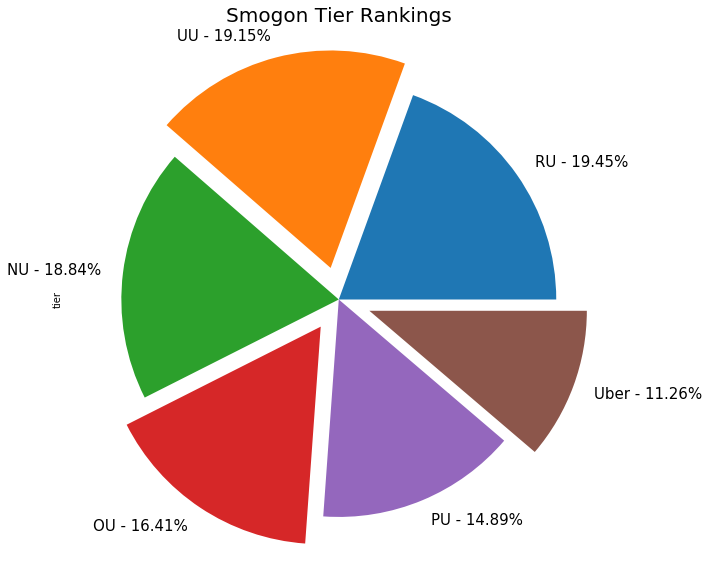

In [17]:
tier = pokemon['tier'].value_counts()

print(tier)

tier = tier.plot(kind = 'pie',
                  figsize = (10, 10),
                  explode = (0, 0.15, 0, 0.15, 0, 0.15),
                  labels = ('RU - 19.45%', 'UU - 19.15%', 'NU - 18.84%', 'OU - 16.41%', 'PU - 14.89%', 'Uber - 11.26%'),
                  fontsize = (15))

tier.set_title('Smogon Tier Rankings', fontsize = 20)

There are a number of properties of a Pokemon which determine it's tier placing.
<br>
Example of these factors are it's Base Stats, it's abilities, it's typing, and the item it holds.
<br>
For the purposes of this classification I will be considering the Base Stats of each Pokemon.

Now that the Pokemon have been separated by tier it would be interesting to see the spread of each of their Base Stats.
<br> 
Each Pokemon's base stat total is a combination of:
<br>
Health Points (hp) which dictates how much health points the Pokemon has.
<br>
Attack - this dictates the damage that a Pokemon will cause to the opponent when attacking with a Physical attack.
<br>
Defense - this dictates the damage that a Pokemon will take from the opponent when attacked with a Physical attack.
<br>
Special Attack (sp_attack) - this dictates the damage that a Pokemon will cause to the opponent when attacking with a Special attack.
<br>
Special Defense (sp_defense) - this dictates the damage that a Pokemon will take from the opponent when attacked with a Special attack.
<br>
Speed - as Pokemon is turn based game the Speed stat of a Pokemon dictates the order of a turn. A Pokemon with a higher Speed stat will normally attack first, although this turn order can be affected by priority moves or by having the order reversed (such as by use of the move Trick Room).
<br>
Base Stat Total (base_total) - this is a linear combination of the aforementioned 6 stats.

Some columns exist in the dataset which generate summary statistics which are not necessary for analysis.
<br>
The following columns were thus removed at this point:
<br>
generation
<br>
legendary
<br>
alternate

In [18]:
pokemon = pokemon.drop('generation', axis = 1)
pokemon = pokemon.drop('legendary', axis = 1)
pokemon = pokemon.drop('alternate', axis = 1)

Folowing the removal of these unnecessary columns summary statistics were generated for each of the tiers within the dataset.

In [19]:
uber = pokemon[pokemon['tier'].str.contains("Uber")]
uber.mean()

hp             98.810811
attack        117.027027
defense        96.594595
sp_attack     122.351351
sp_defense     98.810811
speed         102.054054
base_total    635.621622
dtype: float64

In [20]:
ou = pokemon[pokemon['tier'].str.contains("OU")]
ou.mean()

hp             85.055556
attack        100.074074
defense        90.703704
sp_attack      95.129630
sp_defense     88.166667
speed          87.462963
base_total    546.592593
dtype: float64

In [21]:
uu = pokemon[pokemon['tier'].str.contains("UU")]
uu.mean()

hp             86.841270
attack         94.904762
defense        85.968254
sp_attack      89.730159
sp_defense     84.015873
speed          84.761905
base_total    526.142857
dtype: float64

In [22]:
ru = pokemon[pokemon['tier'].str.contains("RU")]
ru.mean()

hp             81.203125
attack         91.187500
defense        92.578125
sp_attack      86.625000
sp_defense     93.109375
speed          75.687500
base_total    519.906250
dtype: float64

In [23]:
nu = pokemon[pokemon['tier'].str.contains("NU")]
nu.mean()

hp             80.096774
attack         91.016129
defense        81.032258
sp_attack      80.612903
sp_defense     80.080645
speed          80.596774
base_total    493.419355
dtype: float64

In [24]:
pu = pokemon[pokemon['tier'].str.contains("PU")]
pu.mean()

hp             76.408163
attack         87.040816
defense        82.571429
sp_attack      77.265306
sp_defense     78.734694
speed          71.857143
base_total    473.673469
dtype: float64

Below are histograms and density plots (overlayed with one another) for each of the Pokemon's base stats.

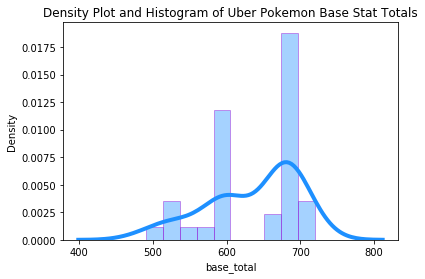

In [25]:
plt.title('Density Plot and Histogram of Uber Pokemon Base Stat Totals')
plt.ylabel("Density")
sns.distplot(uber['base_total'], hist=True, kde=True, 
             bins=int(10), color = 'dodgerblue', 
             hist_kws={'edgecolor':'darkviolet'},
             kde_kws={'linewidth': 4})

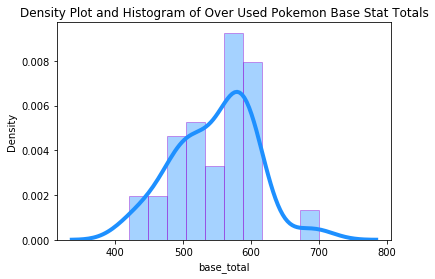

In [26]:
plt.title('Density Plot and Histogram of Over Used Pokemon Base Stat Totals')
plt.ylabel("Density")
sns.distplot(ou['base_total'], hist=True, kde=True, 
             bins=int(10), color = 'dodgerblue', 
             hist_kws={'edgecolor':'darkviolet'},
             kde_kws={'linewidth': 4})

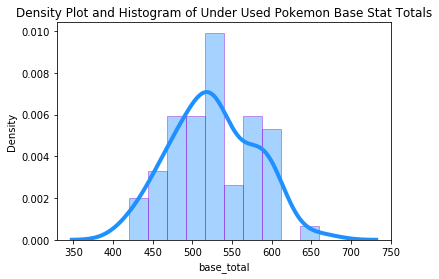

In [27]:
plt.title('Density Plot and Histogram of Under Used Pokemon Base Stat Totals')
plt.ylabel("Density")
sns.distplot(uu['base_total'], hist=True, kde=True, 
             bins=int(10), color = 'dodgerblue', 
             hist_kws={'edgecolor':'darkviolet'},
             kde_kws={'linewidth': 4})

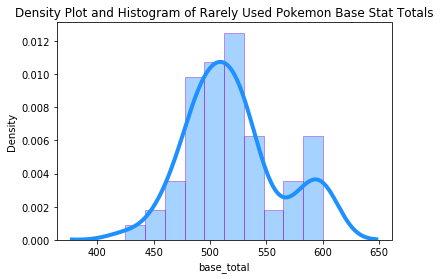

In [28]:
plt.title('Density Plot and Histogram of Rarely Used Pokemon Base Stat Totals')
plt.ylabel("Density")
sns.distplot(ru['base_total'], hist=True, kde=True, 
             bins=int(10), color = 'dodgerblue', 
             hist_kws={'edgecolor':'darkviolet'},
             kde_kws={'linewidth': 4})

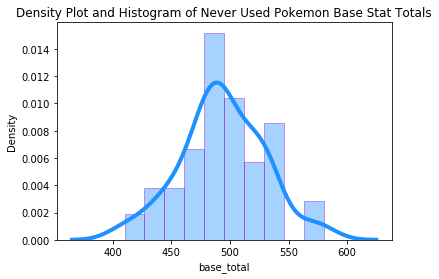

In [29]:
plt.title('Density Plot and Histogram of Never Used Pokemon Base Stat Totals')
plt.ylabel("Density")
sns.distplot(nu['base_total'], hist=True, kde=True, 
             bins=int(10), color = 'dodgerblue', 
             hist_kws={'edgecolor':'darkviolet'},
             kde_kws={'linewidth': 4})

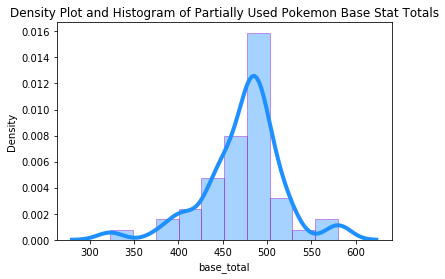

In [30]:
plt.title('Density Plot and Histogram of Partially Used Pokemon Base Stat Totals')
plt.ylabel("Density")
sns.distplot(pu['base_total'], hist=True, kde=True, 
             bins=int(10), color = 'dodgerblue', 
             hist_kws={'edgecolor':'darkviolet'},
             kde_kws={'linewidth': 4})

In order to allow a further visual comparison of each of the tiers of Pokemon I have produced a Violin Plot via the code below.
<br>
The official ranking for the tiers in order is:
<br>
Uber
<br>
Over Used (OU)
<br>
Under Used (UU)
<br>
Rarely Used (RU)
<br>
Never Use (NU)
<br>
Partially Used (PU)

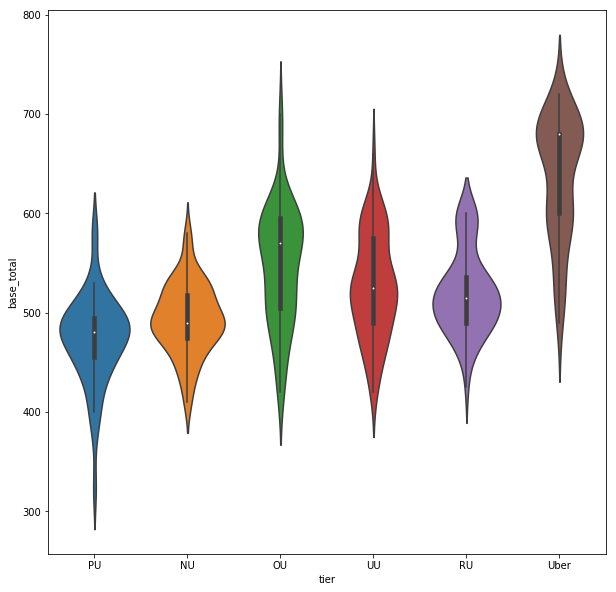

In [31]:
plt.figure(figsize=(10,10))
sns.violinplot(x='tier', y='base_total', data=pokemon)

As can be seen from this the Uber tier has not only the highest Base Stat Total amongst the 6 tiers but also it's Mean Base Stat Total is also much higher.
<br>
The other 5 tiers seem to follow the expected pattern in that the Mean Base Total for them follows the order in which the tiers are ranked.
<br>
Given that Base Stat Totals seem to very spread amongst some of the tiers, it should be noted again that a number of other factors affect the tier placement of a Pokemon. 
<br>
Access to specific move combinations and abilities have an influence which cannot be understated.

Unsupervised Methods

The dataset currently has a number of categories which are either not necessary for analysis as they don't relate to the Pokemon's base stat or they are not viable for conducting analysis as they are categorical.
<br>
In order to continue the analysis the following columns were removed:
<br>
name - the name of a Pokemon does not indicate anything about the Pokemon normally, and can be removed.
<br>
type_1 - while the type of a Pokemon could have a bearing upon a Pokemon's tier this analysis will only consider the influence of a Pokemon's Base Stats.
<br>
type_2 - same reasoning as for removing type_1 from the dataset.
<br>
The below lines of code remove these columns from this analysis.

In [32]:
pokemon = pokemon.drop('name', axis = 1)
pokemon = pokemon.drop('type_1', axis = 1)
pokemon = pokemon.drop('type_2', axis = 1)

We now have a Dataset which contains all of the Base Stats of each of the Pokemon along with to which Tier each Pokemon belongs.
<br>
In order to include the Tier of the Pokemon in the K Means Clustering the following function was created which re-classifies each Tier to a numeric value based upon it's rank when compared to the others.

In [33]:
def tier_rank(tier):
    if tier == 'Uber':
        return 0
    elif tier == 'OU':
        return 1
    elif tier == 'UU':
        return 2
    elif tier == 'RU':
        return 3
    elif tier == 'NU':
        return 4
    else:
        return 5
    
pokemon['tier_rank'] = pokemon['tier'].apply(tier_rank)

Given that the reason for this function was to catergorise the Tier status of each Pokemon numerically, the tier column of the Pokemon dataset was also dropped by the line of code below.
<br>
In order that we can use the Tier category later in the analysis I have chosen to create Pokemon1 as a new variable, which contains all of the same information as the original Pokemon variable with the exception of the Tier column.

In [34]:
pokemon1 = pokemon.drop('tier', axis = 1)

The dataset is now ready to have K Means Clustering applied to it.
<br>
K means clustering would normally involve iteration over a number of different values to K to determine how many clusters to look for in the data. This would normally involve the elbow method.
<br>
Given we have 6 specific Tiers which Pokemon can be classifed into, it makes logical sense to choose K as 6 in this case.

In [35]:
# defining the kmeans function
kmeans = KMeans(n_clusters=6)
#scaling the data for the k means algorithm
pokemon_scaled = scale(pokemon1)
#this scaled data will also be used for the purposes of Supervised Learning

In [36]:
x1 = []
x2 = []

In [37]:
for i in range(1, 51):
    kmeans.fit(pokemon_scaled)
    kmeans_complete = metrics.completeness_score(pokemon.tier_rank, kmeans.labels_)
    kmeans_homogeneity = metrics.homogeneity_score(pokemon.tier_rank, kmeans.labels_)
    x1.append(kmeans_complete)
    x2.append(kmeans_homogeneity)

In [38]:
mean_complete = sum(x1)/50
print('The average completeness score for 6 clusters is {}'.format(mean_complete))
mean_homo = sum(x2)/50
print('The average homogeneity score for 6 clusters is {}'.format(mean_homo))

The average completeness score for 6 clusters is 0.2122371446531239
The average homogeneity score for 6 clusters is 0.1980369635046033


The following codes generate scatterplots.
<br>
Colours are assigned based upon the cluster's identified during the K Means Clustering Method employed above.
<br>
The purpose of this is for the sake of a visualisation of the clusters found.

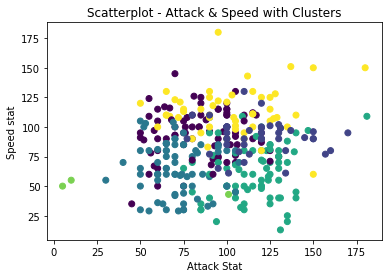

In [39]:
plt.title('Scatterplot - Attack & Speed with Clusters')
plt.xlabel('Attack Stat')
plt.ylabel('Speed stat')
plt.scatter(pokemon1['attack'], pokemon1['speed'], c= kmeans.labels_.astype(float))

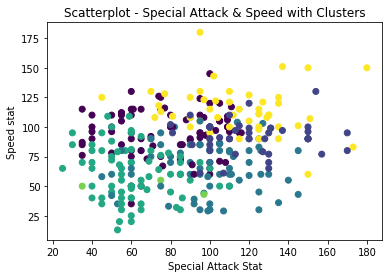

In [40]:
plt.title('Scatterplot - Special Attack & Speed with Clusters')
plt.xlabel('Special Attack Stat')
plt.ylabel('Speed stat')
plt.scatter(pokemon1['sp_attack'], pokemon1['speed'], c= kmeans.labels_.astype(float))

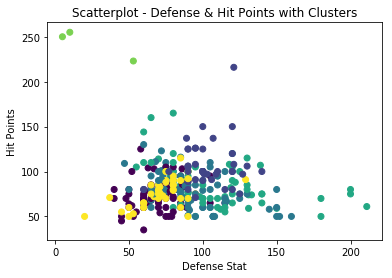

In [41]:
plt.title('Scatterplot - Defense & Hit Points with Clusters')
plt.xlabel('Defense Stat')
plt.ylabel('Hit Points')
plt.scatter(pokemon1['defense'], pokemon1['hp'], c= kmeans.labels_.astype(float))

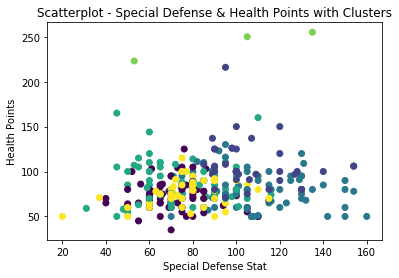

In [42]:
plt.title('Scatterplot - Special Defense & Health Points with Clusters')
plt.xlabel('Special Defense Stat')
plt.ylabel('Health Points')
plt.scatter(pokemon1['sp_defense'], pokemon1['hp'], c= kmeans.labels_.astype(float))

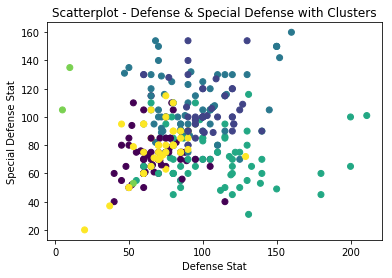

In [43]:
plt.title('Scatterplot - Defense & Special Defense with Clusters')
plt.xlabel('Defense Stat')
plt.ylabel('Special Defense Stat')
plt.scatter(pokemon1['defense'], pokemon1['sp_defense'], c= kmeans.labels_.astype(float))

Supervised Methods

In [44]:
pokemon2 = pokemon1.drop('tier_rank', axis = 1)
# dropping the column which contains information about which tier the Pokemon belongs as this is a string and cannot be used for the purposes of classification.
# tier_rank is not included in this dataframe as it was exclusively created for "pokemon1" for the purposes of clustering.

In [45]:
pokemon_scaled = scale(pokemon2)
#this scaled data will be used for the purposes of Supervised Learning

While there exist a number of methods for Classification the method I have chosen is K Nearest Neighbours.
<br>
The reasons for this choice are outlined in the report.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(pokemon_scaled, pokemon['tier'], test_size = 0.25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# This code will generate one instance of the K Nearest Neighbours classifer Outputs.
# In order to check for the average score for the accuracy, 
# along with the average returned scores for the KNN classification model,
# an iteration was carried out (see below).

0.20481927710843373
              precision    recall  f1-score   support

          NU       0.15      0.38      0.21        13
          OU       0.27      0.40      0.32        10
          PU       0.33      0.22      0.27        18
          RU       0.30      0.14      0.19        22
          UU       0.00      0.00      0.00        14
        Uber       1.00      0.17      0.29         6

    accuracy                           0.20        83
   macro avg       0.34      0.22      0.21        83
weighted avg       0.28      0.20      0.20        83

[[ 5  2  1  2  3  0]
 [ 2  4  1  1  2  0]
 [10  1  4  2  1  0]
 [ 9  3  4  3  3  0]
 [ 8  3  2  1  0  0]
 [ 0  2  0  1  2  1]]


In [47]:
y1 = []
y2 = []

In [48]:
for i in range (1, 51):
    model = KNeighborsClassifier()
    X_train, X_test, y_train, y_test = train_test_split(pokemon_scaled, pokemon['tier'], test_size = 0.25)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    classification = metrics.classification_report(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    y1.append(accuracy)
    y2.append(confusion)

In [49]:
mean_accuracy = sum(y1)/50
print('The average accuracy score for the KNN classifier is {}'.format(mean_accuracy))
mean_confusion = sum(y2)/50
print('The average values generated for the confusion matrix for the KNN classifier were:')
mean_confusion

The average accuracy score for the KNN classifier is 0.28120481927710844
The average values generated for the confusion matrix for the KNN classifier were:


array([[6.62, 0.86, 3.34, 3.08, 1.58, 0.  ],
       [3.38, 4.08, 1.38, 1.96, 2.22, 0.46],
       [6.12, 0.66, 2.18, 2.62, 0.46, 0.  ],
       [5.5 , 2.42, 3.42, 3.18, 2.02, 0.12],
       [4.5 , 2.9 , 2.76, 3.5 , 1.76, 0.26],
       [0.18, 1.64, 0.18, 0.68, 1.46, 5.52]])

Thank You for taking the time to check & read my code.
<br>
I hope you have enjoyed reading this & my report.